<a href="https://colab.research.google.com/github/Jeff-AB/ECE542FinalProject/blob/jeff-development/ECE542FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECE 542 Final Project

## How to Develop Code for the ECE 542 Final Project
We will be using jupyter notebooks and Google Codelabs to develop our image segmentation application. Each user will work from the same notebook using branches. Here is our strategy to use branches.

1.   Create a public github account(not a NCSU account). Request an invite to the repository from Jeff, and you will receive an email at the account linked to your github with an access link.

2.   Perform the following command to create a local repository on your computer

## Upload Rules
Upload your changes to your branch only. When you think that your changes are sufficient, make a pull request to the master branch from your personal branch and assign other members to review it. After a branch has been merged, everyone has to update their setups with the new master branch. You will be notified of this in the slack channel

Using TensorFlow backend.


32
0
32
0
32
0
32
0
32
0
32
0
32
0
32
0
32
0
32
0
32
0
32
0
32
0
32
0
32
0
32
0
32
0
32
0
32
0
32
0
32
0
32
0
32
0
32
0
32
0
32
0
32
0
32
0
32
0
32
0
32
0
8
0


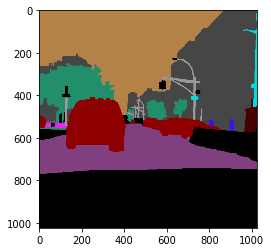

In [1]:
%matplotlib inline
# Data Augmentation Section
'''
This section contains the classes and functions needed to
augment the data for use with MaskRCNN
'''
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from os import listdir, walk
from os.path import isfile, join

from pprint import pprint
from matplotlib import pyplot as plt

import cv2

colab_notebook = False

clpt = 'color_labels/train/'
clpv = 'color_labels/val/'

impt = 'images/train/'
impv = 'images/val/'

num_final_images = 40000 # 40K images to start
testing = True

class SegmentedDataAugmenter:
    def __init__(self, pair_list, num_images_desired, batch_size=32):
        self.num_images = num_images_desired
        self.raw_image_pairs = []
        self.preprocessed_pairs = []
        self.file_pairs = pair_list
        self.MaskRCNN_width = 1024
        self.MaskRCNN_height = 1024
        self.batch_size = batch_size

                
    def load_images(self):
        # Generator function that returns list of label, image tuples 'batch_size' amount at a time
        index = 0
        reducing_file_list = self.file_pairs
        while self.batch_size < len(reducing_file_list):
            self.raw_image_pairs = [] #Dereference old images
            for label_file, image_file in reducing_file_list[:self.batch_size]:
                label_img = cv2.imread(label_file)
                image = cv2.imread(image_file)
                self.raw_image_pairs.append((label_img, image))
            reducing_file_list = reducing_file_list[self.batch_size:]
            yield self.raw_image_pairs
            
        self.raw_image_pairs = [] #Dereference old images
        for label_file, image_file in reducing_file_list[:self.batch_size]:
            label_img = cv2.imread(label_file)
            image = cv2.imread(image_file)
            self.raw_image_pairs.append((label_img, image))
        yield self.raw_image_pairs
            
        
    def nodistort_resize_image(self, image):
        goal_height = self.MaskRCNN_height
        goal_width = self.MaskRCNN_width
        img_shape = image.shape
        #Rescale image to eliminate all padding in final image
        scale_factor = goal_height / img_shape[0]
        dest_size = (int(img_shape[1] * scale_factor), int(img_shape[0] * scale_factor) )
        resized = cv2.resize(image, dest_size)
        #Horizonally crop new image
        img_shape = resized.shape
        del_width = img_shape[1] - goal_width 
        resized = resized[:,int(del_width/2):int(-del_width/2),:]
        return resized
    
    def preprocess_images(self):
        # Generator function that preprocesses x number of images at a time
        for batch_list in self.load_images():
            self.preprocessed_image_batch = [] #Make preprocessed image batch accessible outside of the class
            for segmenting_pair in batch_list:
                label = self.nodistort_resize_image(segmenting_pair[0])
                image = self.nodistort_resize_image(segmenting_pair[1])
                self.preprocessed_image_batch.append((label, image))
            yield self.preprocessed_image_batch
    def process_pair(self):
        #working on this in a local file
        pass
    def save_to_file(self, dest_dir):
        pass


data_dir = None
aug_data_dir = None

# Assign path variables
if not colab_notebook:
    data_dir = 'data/bdd100k/seg/'
    aug_data_dir = 'aug_data/'
else:
    pass #Implement later

# Check if augmented data directory is empty
for dirpath, dirnames, filenames in walk(aug_data_dir):
    if filenames:
        raise Exception("Data already in augmented data directory")

# Generate File Lists from Training Directory
color_labels_train = [ data_dir + clpt + cl for cl in listdir(data_dir + clpt) if isfile(join(data_dir + clpt, cl)) ] 
images_train = [ data_dir + impt + img for img in listdir(data_dir + impt) if isfile(join(data_dir + impt, img)) ]

# Images with label map pair have the same file prefix
color_labels_train.sort()
images_train.sort()

data_pairs = list(zip(color_labels_train, images_train))

# Testing Resizing
image_augment = SegmentedDataAugmenter(data_pairs[:1000], 1) #test on first 1000 entries

#plt.imshow(image_augment.raw_image_pairs[0][1])
resized = None
for image_list in image_augment.preprocess_images():
    #Debug Memory Usage
    print(len(image_augment.raw_image_pairs))
    print(len(image_augment.preprocessed_pairs))
    resized=image_list[0][0]
    plt.imshow(resized)
    